MLP regressor deep learning kategorisine giren Keras ve Tensorflow R2 skorlarına göre daha yüksek bir skor yakaladı. MLP regressor tek katmanlı bir sinir ağ modeli ve dolayısıyla keras ve tensorflow gerisinde kalması beklentimdi. Skor fazlalığının nedeni incelendiği zaman overfit olduğu için skorun yüksek gözüktüğü ancak veri yakından görselleştirilip diğer modeller ile karşılaştırıldığı zaman MLP regressorun uç hata yapma olasılığının daha yüksek olduğu görülüyor.

In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor


In [77]:
df = pd.read_csv("verilerist4_wdummies.csv")

In [78]:
y = df.Fiyatlar.values.reshape(-1,1)
x = df.drop(["Fiyatlar"], axis=1)

In [79]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 0, shuffle=True)
model = MLPRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
r2 = r2_score (y_test, y_pred)
r2

0.7653026211223436

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [86]:
testTahminleri = model.predict(x_test)


In [87]:
testTahminleri = scaler.inverse_transform(testTahminleri.reshape(-1, 1))
testTahminleri

array([[ 8615.49926043],
       [42386.76394715],
       [35226.82422036],
       ...,
       [19289.92718476],
       [13355.52022681],
       [29333.85154663]])

In [88]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [89]:
tahminDf

,Gerçek Y
0,17000.0
1,37500.0
2,24000.0
3,10500.0
4,13500.0
...,...
2247,13000.0
2248,45000.0
2249,17000.0
2250,15000.0


In [90]:
testTahminleri = pd.Series(testTahminleri.reshape(2252,))

In [91]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [92]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]
tahminDf.sort_values("Tahmin Y",ascending= True).head(50)

,Gerçek Y,Tahmin Y
17,16500.0,-18667.876611
222,17500.0,-12852.926492
1848,20000.0,-12337.720182
1716,7000.0,-12066.001138
1265,11600.0,-8275.774896
1743,12000.0,-7037.551490
1446,20000.0,-6933.337857
2152,9500.0,-4571.894450
428,10000.0,-4101.360340
1868,9000.0,-4091.382220


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

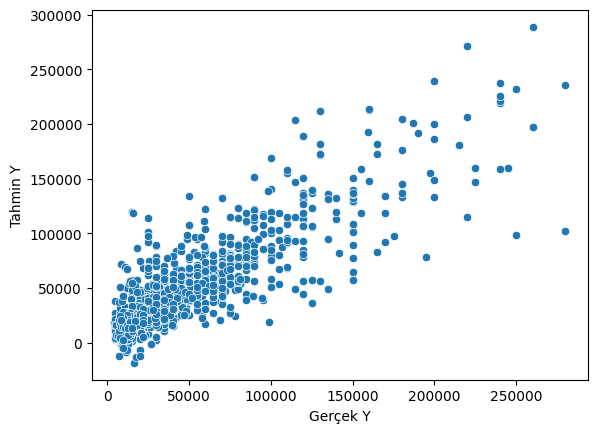

In [93]:
import seaborn as sbn
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf)
#Tahmin ve test geraçek verimizi görselleştiriyoruz. Verinin dağılımı birbirine ne kadar yakınsa
#modelimiz o kadar başarılı olmuş diyebiliriz.

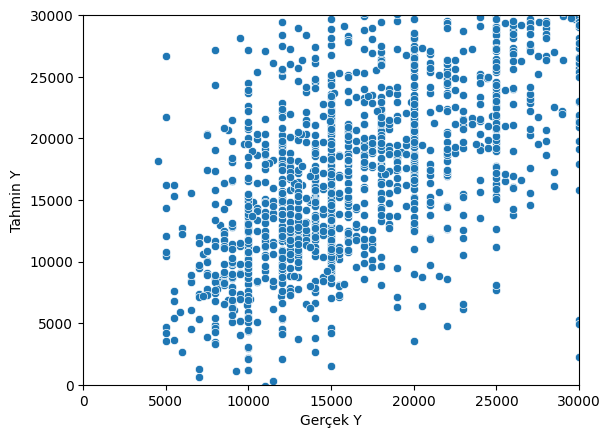

In [94]:
import matplotlib.pyplot as plt

sbn.scatterplot(x="Gerçek Y", y="Tahmin Y", data=tahminDf)

plt.xlim(0, 30000)
plt.ylim(0, 30000)

plt.show()

#Daha yakından gözlemlemek anlamamız için daha net olacaktır.


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Modelin performansını değerlendirmek için ortalama hata değerlerine bakacağız. Bu metrikler bizim görselleştirme
#ile anlamaya çalıştığımız model performansının sayısala dökülmüş hali.

In [95]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

9991.929973064198

In [96]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

307816303.89579594

In [97]:
from sklearn.metrics import r2_score
r2_skoru = r2_score(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

print("R2 Skoru:", r2_skoru)

R2 Skoru: 0.7653026211223436
